In [ ]:
!pip3 install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


**Importing the necessary libraries**

1. `pandas as pd` Pandas is a python library used for data manipulations
2. `sklearn.*` Scikit-Learn is a Machine Learning framework
3. `category_encoders` Category Encoders is a data preprocessing library specialized in Categorical Encoding



In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from category_encoders import CountEncoder

**Data preprocessing**


1. Dropping columns with 70 % or more null/NaN values and columns with low correlation standards like brand of the equipment used.
2. Encoding categorical data with a `CountEncoder()` for encoding the frequency.
3. Imputing missing data rows with a `KNNImputer()` with `k = 3`.

In [ ]:
# df = pd.read_csv('train data.csv')
# df = df.loc[:, df.isnull().sum() < 0.7*df.shape[0]]
# y = ['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']
# Y = df[y]
# x = df.drop(columns=y).drop(columns=['GROUP', 'FORMATION'])
# encoder = CountEncoder(cols=['WELL'])
# x = encoder.fit_transform(x)
# imputer = KNNImputer(n_neighbors=3)
# imputed_x = imputer.fit_transform(x)
# x = pd.DataFrame(imputed_x, columns=x.columns)

# def slope(p1,p2):
#     x1, y1 = p1
#     x2, y2 = p2
#     if x2 != x1:
#         return((y2-y1)/(x2-x1))
#     else:
#         return 'NA'

# def drawLine(image, a, b, t=2):
#     x1, y1=a
#     x2, y2=b
#     m = slope(a, b)
#     h, w = image.shape[:2]

#     if m != 'NA':
#         px = 0
#         py = -(x1-0)*m + y1
#         qx = w
#         qy = -(x2-w)*m + y2
#     else:
#         px, py = x1, 0
#         qx, qy = x1, h
#     cv2.line(image, (int(px), int(py)), (int(qx), int(qy)), (0, 255, 0), t)
#     return image

# import random

# height, width, _ = img2.shape
# endpoints_range = set()
# for j in range(width+1):
#   endpoints_range.add((j, 0))
#   endpoints_range.add((j, height))
# for i in range(height+1):
#   endpoints_range.add((0, i))
#   endpoints_range.add((width, i))
# [a, b] = random.choices(list(endpoints_range), k=2)
# img = drawLine(img2, a, b)
# io.imshow(img)

In [ ]:
x = pd.read_csv('imputed_x.csv').drop(columns=['Unnamed: 0'])
x.head()

FileNotFoundError: ignored

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow

In [ ]:
def get_grain_size(filepath, width, iter=0, image=False):
  """
  GET average grain size from image path
  """
  img = cv2.imread(filepath, 0)
  h, w, = img.shape
  avg_size = (h + w)/2
  # print(avg_size)
  pixels_to_um = width / avg_size # (avg_size px = width um) -> 1 px = (width/avg_size) um
  ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


  kernel = np.ones((3,3),np.uint8)
  eroded = cv2.erode(thresh,kernel,iterations = iter)
  dilated = cv2.dilate(eroded,kernel,iterations = iter)

  mask = dilated == 255  #Sets TRUE for all 255 valued pixels and FALSE for 0

  s = [[1,1,1],[1,1,1],[1,1,1]]
  labeled_mask, num_labels = ndimage.label(mask, structure=s)

  img2 = color.label2rgb(labeled_mask, bg_label=0)

  if image:
    io.imshow(img2)

  clusters = measure.regionprops_table(labeled_mask, img, properties=['equivalent_diameter', 'area', 'perimeter'])
  return [clusters, (clusters['equivalent_diameter'] * pixels_to_um).mean()]

14.843727727055093


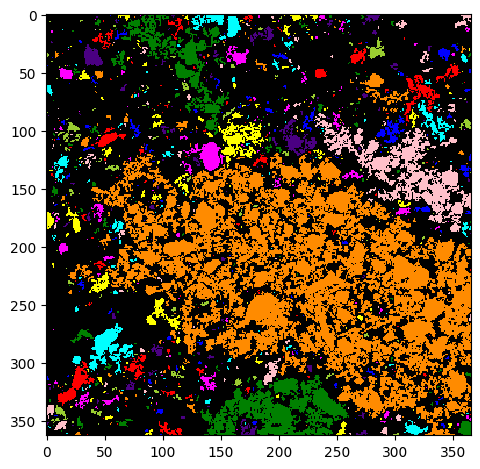

In [ ]:
width = 1700 # @param {type:"slider", min:800, max:1700, step:1}
print(get_grain_size('sbasalt.png', width, 0, True)[1])

In [ ]:
xdf = pd.read_csv('imputed_x.csv').drop(columns=['Unnamed: 0', 'CALI', 'RSHA', 'RMED', 'PEF', 'DTC', 'SP'])
xdf.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,RDEP,RHOB,GR,NPHI,BS,ROP,DRHO,MUDWEIGHT
0,18270.0,494.528,437641.9688,6470972.5,-469.501831,1.798681,1.884186,80.200851,0.702698,25.999998,34.636410,-0.574928,0.129413
1,18270.0,494.680,437641.9688,6470972.5,-469.653809,1.795641,1.889794,79.262886,0.702698,25.999998,34.636410,-0.570188,0.129413
2,18270.0,494.832,437641.9688,6470972.5,-469.805786,1.800733,1.896523,74.821999,0.702698,25.999998,34.779556,-0.574245,0.129413
3,18270.0,494.984,437641.9688,6470972.5,-469.957794,1.801517,1.891913,72.878922,0.702698,25.999998,39.965164,-0.586315,0.129413
4,18270.0,495.136,437641.9688,6470972.5,-470.109772,1.795299,1.880034,71.729141,0.756217,25.999998,57.483765,-0.597914,0.129413


In [ ]:
ydf = pd.read_csv('train data.csv')[['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']]
ydf.head()

,DEPTH_MD,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,494.528,65000.0,1.0
1,494.680,65000.0,1.0
2,494.832,65000.0,1.0
3,494.984,65000.0,1.0
4,495.136,65000.0,1.0


In [ ]:
df = pd.merge(xdf, ydf, on='DEPTH_MD')
df.info()
df.to_csv('final_x-1.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17912 entries, 0 to 17911
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   WELL                               17912 non-null  float64
 1   DEPTH_MD                           17912 non-null  float64
 2   X_LOC                              17912 non-null  float64
 3   Y_LOC                              17912 non-null  float64
 4   Z_LOC                              17912 non-null  float64
 5   RDEP                               17912 non-null  float64
 6   RHOB                               17912 non-null  float64
 7   GR                                 17912 non-null  float64
 8   NPHI                               17912 non-null  float64
 9   BS                                 17912 non-null  float64
 10  ROP                                17912 non-null  float64
 11  DRHO                               17912 non-null  flo

In [ ]:
lithology_map = {
    30000: 'Sandstone',
    65030: 'Sandstone/Shale',
    65000: 'Shale',
    80000: 'Marl',
    74000: 'Dolomite',
    70000: 'Limestone',
    70032: 'Chalk',
    88000: 'Halite',
    86000: 'Anhydrite',
    99000: 'Tuff',
    90000: 'Coal',
    93000: 'Basement'
}

df = df.replace({'FORCE_2020_LITHOFACIES_LITHOLOGY': lithology_map})
df.head()

In [ ]:
clusters = get_grain_size('test-grain-4.jpg', width)[0]
sorting_map = {
    -1: "N/A",
    0: "Very Well Sorted",
    1: "Well Sorted",
    2: "Moderately Sorted",
    3: "Poorly Sorted",
    4: "Very Poorly Sorted",
    5: "Extremely Poorly Sorted",
}

def get_sorting(cluster):
  phi84 = np.percentile(cluster['equivalent_diameter'], 84)
  phi16 = np.percentile(cluster['equivalent_diameter'], 16)
  phi95 = np.percentile(cluster['equivalent_diameter'], 95)
  phi5 = np.percentile(cluster['equivalent_diameter'], 5)

  igsd = round(((phi84 - phi16) / 4.) + ((phi95 - phi5) / 6.6), 3)
  sorting = -1
  if igsd <= 0.35:
    sorting = 0
  elif (igsd > 0.35) and (igsd <= 0.5):
    sorting = 1
  elif (igsd > 0.5) and (igsd <= 1):
    sorting = 2
  elif (igsd > 1) and (igsd <= 2):
    sorting = 3
  elif (igsd > 2) and (igsd <= 4):
    sorting = 4
  else:
    sorting = 5
  print('Inclusive Graphic Standard Deviation, value: {}, sorting: {}'.format(igsd, sorting_map[sorting]))

get_sorting(clusters)

Inclusive Graphic Standard Deviation, value: 2.526, sorting: Very Poorly Sorted


In [ ]:
from math import pi
clusters = get_grain_size('test-grain-3.jpg', width)[0]

def get_roundness(cluster):
  circulars_count = 0
  for area, perimeter in zip(cluster['area'], cluster['perimeter']):
    if perimeter == 0:
      continue
    circularity = 4 * pi * (area / (perimeter * perimeter))
    if 0.7 < circularity < 1.2:
        circulars_count += 1
  return circulars_count / len(cluster['area'])

get_roundness(clusters)

15


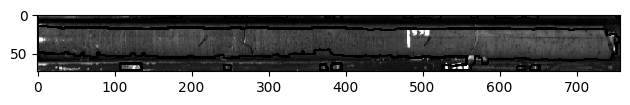

In [ ]:
import cv2
from skimage import io
import numpy as np

def draw_grid(img, grid_shape, color=(0, 255, 0), thickness=1):
    h, w = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv2.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv2.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img

def threshold(image, min_limit=None, max_limit=255, clip=0):
    if min_limit is None:
        min_limit = int(np.mean(image) + clip)

    _, image = cv2.threshold(image,
                             min_limit,
                             max_limit,
                             cv2.THRESH_BINARY)
    return image

def get_approx_fractures(filepath):
  img = cv2.imread(filepath, 0)
  height, width = img.shape
  subsets = {}
  window = 48
  for i in range(0, height, window):
    for j in range(0, width, window):
      subset = img[j:j+window, i:i+window]
      subsets['{}.{}'.format(j, i)] = subset

  def getindex(row, col):
    return subsets['{}.{}'.format(row * window, col * window)]

  train_img = cv2.erode(threshold(img), (3,3), iterations=7)
  blurred_img = cv2.GaussianBlur(train_img, (9, 9), 5)

  contours, _ = cv2.findContours(blurred_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contour_image = img.copy()
  cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
  return len(contours), contour_image, contours

f, i, c = get_approx_fractures('dbasalt.jpg')
print(f)
io.imshow(i)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from category_encoders import CountEncoder

In [ ]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

In [ ]:
def get_grain_size(filepath, width, iter=0, image=False):
  """
  GET average grain size from image path
  """
  img = cv2.imread(filepath, 0)
  h, w, = img.shape
  avg_size = (h + w)/2
  # print(avg_size)
  pixels_to_um = width / avg_size # (avg_size px = width um) -> 1 px = (width/avg_size) um
  ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


  kernel = np.ones((3,3),np.uint8)
  eroded = cv2.erode(thresh,kernel,iterations = iter)
  dilated = cv2.dilate(eroded,kernel,iterations = iter)

  mask = dilated == 255  #Sets TRUE for all 255 valued pixels and FALSE for 0

  s = [[1,1,1],[1,1,1],[1,1,1]]
  labeled_mask, num_labels = ndimage.label(mask, structure=s)

  img2 = color.label2rgb(labeled_mask, bg_label=0)

  if image:
    io.imshow(img2)

  clusters = measure.regionprops_table(labeled_mask, img, properties=['equivalent_diameter', 'area', 'perimeter'])
  return [clusters, (clusters['equivalent_diameter'] * pixels_to_um).mean()]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10,
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', n_clusters=1, n_init=10)

In [ ]:
img = cv2.imread('dbasalt.jpg',cv2.IMREAD_UNCHANGED)

data = np.reshape(img, (-1, 3))
print(data.shape)
data = np.float32(data)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))


(55261, 3)
Dominant color is: bgr([50 50 49])


In [ ]:
from sklearn.cluster import KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10,
    random_state=None, tol=0.0001, verbose=0)
img = cv2.imread('core.jpeg',cv2.IMREAD_UNCHANGED)

data = np.reshape(img, (-1, 3))
print(data.shape)
data = np.float32(data)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)
print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))

import numpy as np

def find_closest_color_name(target_color, color_palette):
    color_names = ['Gray', 'Yellow', 'Brown', 'Red', 'White', 'Pink', 'Black', 'Beige', 'Green', 'Blue']

    # Convert target color to numpy array in BGR format
    target_bgr = np.array(target_color, dtype=np.uint8)

    # Convert color palette to numpy array in BGR format
    color_palette = np.array(color_palette, dtype=np.uint8)

    # Calculate Euclidean distances
    distances = np.linalg.norm(color_palette - target_bgr, axis=1)

    # Find index of the closest color
    closest_color_index = np.argmin(distances)

    # Return the name of the closest color
    closest_color_name = color_names[closest_color_index]
    return closest_color_name

color_palette = [
    (128, 128, 128),  # Gray
    (0, 255, 255),    # Yellow
    (102, 176, 255),    # Brown
    (0, 0, 255),      # Red
    (255, 255, 255),  # White
    (193, 182, 255),  # Pink
    (0, 0, 0),        # Black
    (220, 245, 245),  # Beige
    (0, 255, 0),      # Green
    (255, 0, 0),      # Blue
]


target =  tuple(centers[0].astype(int))
color_grain = find_closest_color_name(target, color_palette)

In [ ]:
def classify_stone(grain_size, color_g):
    results = []
    if (grain_size <= 4) and (color_g == 'Gray'):
        results.append("Shale")
    if (57 < grain_size <= 2000) and (color_g in ['Gray', 'Yellow', 'Brown', 'Red']):
        results.append("Sandstone")
    if (grain_size >= 1) and (color_g in ['Gray', 'Yellow', 'White']):
        results.append("Limestone")
    if (57 <= grain_size <= 2000) and (color_g in ['Pink', 'Gray', 'Black', 'White', 'Brown', 'Red', 'Beige']):
        results.append("Granite")
    if (45 <= grain_size <= 250) and (color_g in ['White', 'Gray', 'Pink', 'Yellow', 'Blue', 'Green']):
        results.append("Quartzite")
    if (7 <= grain_size <= 2000) and (color_g in ['Black', 'Green', 'Red']):
        results.append("Tuff")
    if (grain_size < 1000) and (color_g in ['Black', 'Gray'])
        results.append("Basalt")

    if len(results) > 1:
        result_string = " or ".join(results)
        print(f'Stone type: {result_string}')
    elif results:
        print(f'Stone type: {results[0]}')
    else:
        print("Unable to classify the stone type.")

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the pre-trained model
model_path = 'my_model.h5'
loaded_model = load_model(model_path)

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Convert the image to a NumPy array and normalize pixel values
    img = img.astype(np.float32) / 255.0

    # Expand dimensions to create a batch of size 1
    img = np.expand_dims(img, axis=0)

    return img

# Example usage
image_path = '9.jpg'
preprocessed_image = load_and_preprocess_image(image_path)
import pandas as pd

# Define the image path
image_path = 'crack.jpg'

# Create a DataFrame
data = {'filepath': [image_path], 'label': ['unknown']}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Make predictions
predictions = loaded_model.predict(preprocessed_image)

# Post-process predictions (assuming single class prediction)
predicted_class_index = np.argmax(predictions, axis=1)[0]

print(f"The predicted class index for the image is: {predicted_class_index}")


error: ignored

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()